In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Cheack the data set

In [88]:
df.shape

(200, 5)

In [89]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [90]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [91]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [92]:
df.duplicated().sum()

0

EDA

_cheack outliears

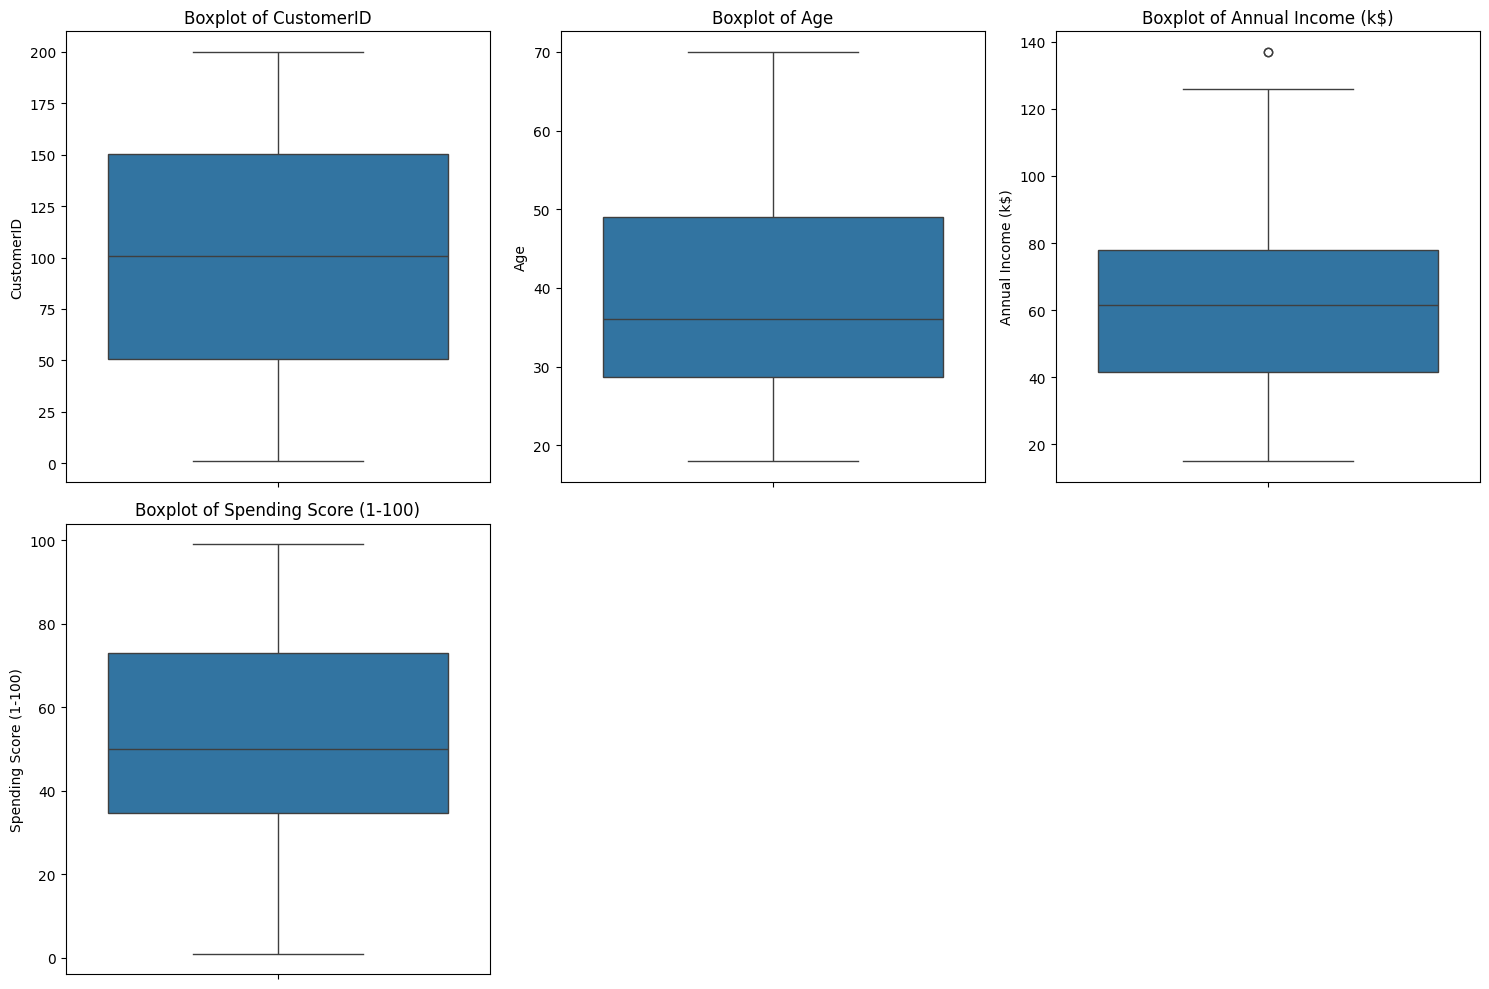

In [93]:
# Select numeric columns
numeric_columns = df.select_dtypes(include='number').columns

# Define grid size
num_cols = 3  
num_rows = -(-len(numeric_columns) // num_cols) 

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten for easy iteration

# Plot each boxplot in a subplot
for i, col in enumerate(numeric_columns):
    sns.boxplot(y=df[col], ax=axes[i])  # Vertical boxplot
    axes[i].set_title(f'Boxplot of {col}')

# Hide unused subplots if the number of columns is not a multiple of num_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

_Visualize Data Distribution

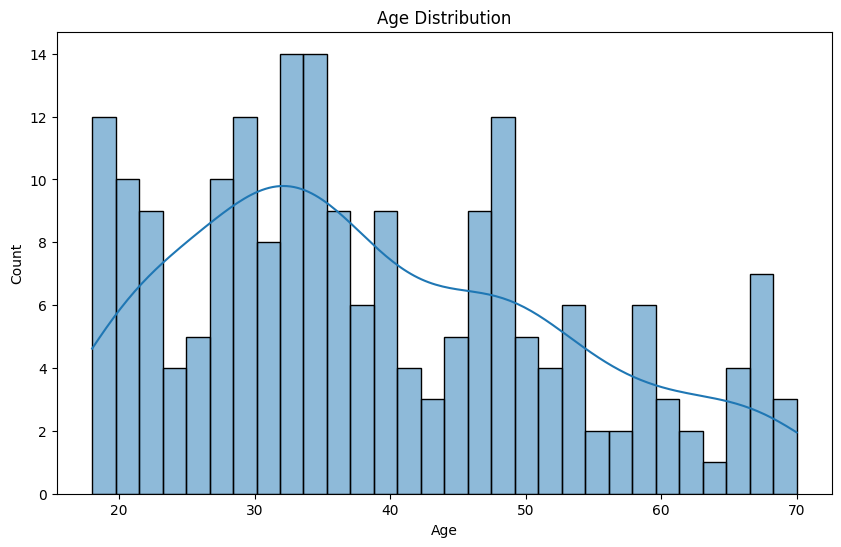

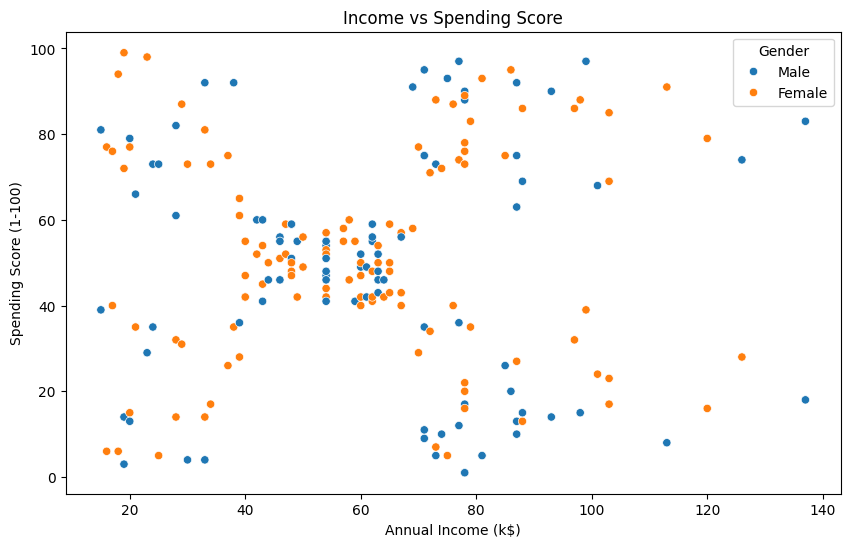

In [94]:
# Age Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# Income vs Spending Score
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender')
plt.title("Income vs Spending Score")
plt.show()



Select Features for Clustering

In [95]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

Find Optimal Number of Clusters (Elbow Method)

In [96]:
from sklearn.cluster import KMeans

d:\my web\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\my web\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\my web\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\my web\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\my web\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' 

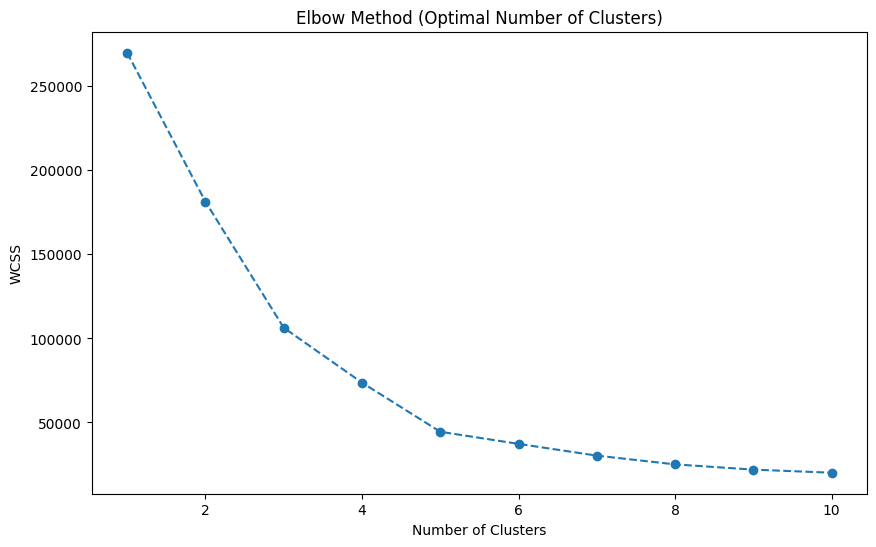

In [97]:
wcss = []  

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method (Optimal Number of Clusters)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Apply K-Means Clustering

In [98]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X)
df['Cluster'] = clusters

d:\my web\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



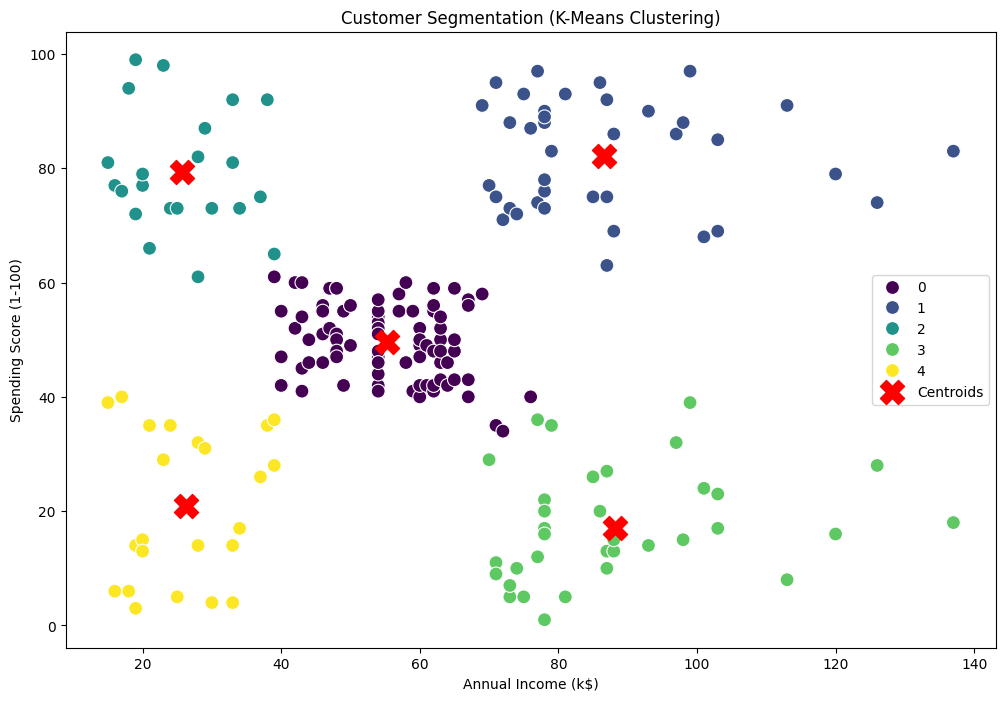

In [99]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Cluster', palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red', marker='X', label='Centroids')
plt.title('Customer Segmentation (K-Means Clustering)')
plt.legend()
plt.show()

Interpret the Clusters

In [100]:
cluster_counts = df['Cluster'].value_counts().sort_index()
display(cluster_counts)

Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64

In [101]:
# Calculate average age, income, and spending for each cluster
cluster_stats = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'Gender': lambda x: x.mode()[0]  
}).round(1)

print("\nCluster Statistics:")
display(cluster_stats)


Cluster Statistics:


,Age,Annual Income (k$),Spending Score (1-100),Gender
Cluster,,,,
0,42.7,55.3,49.5,Female
1,32.7,86.5,82.1,Female
2,25.3,25.7,79.4,Female
3,41.1,88.2,17.1,Male
4,45.2,26.3,20.9,Female


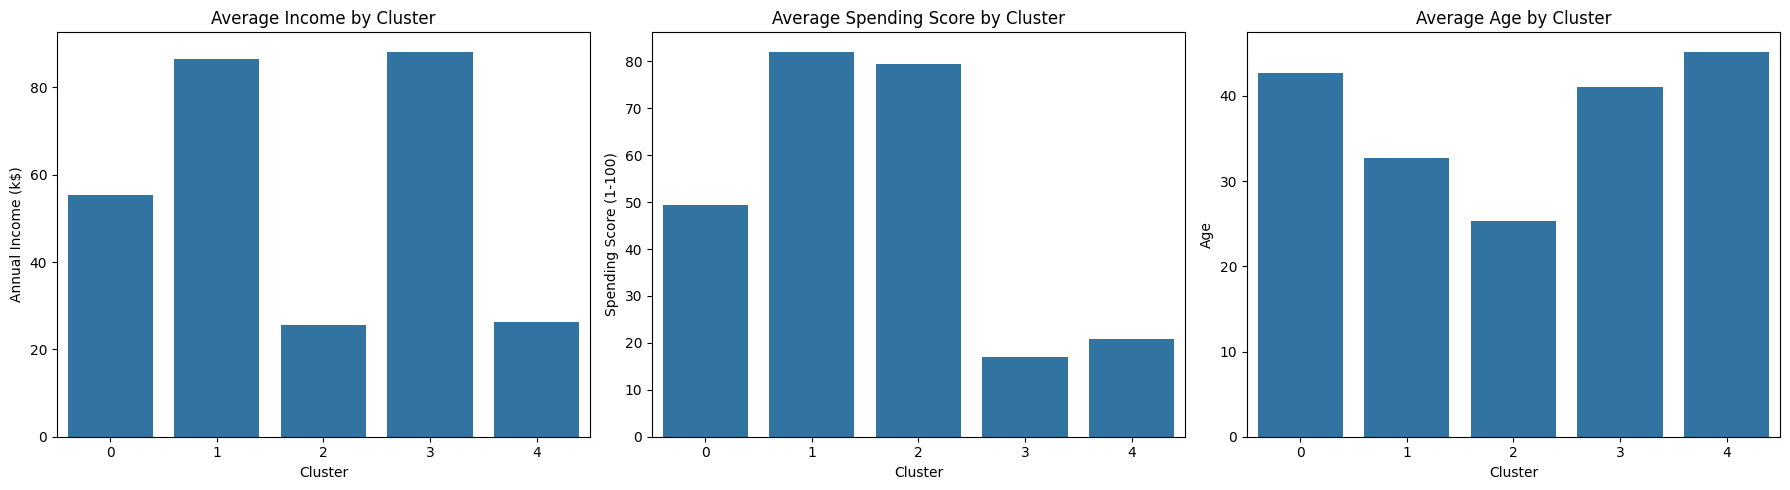

In [102]:
# Plot comparison of cluster averages
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Income comparison
sns.barplot(x=cluster_stats.index, y='Annual Income (k$)', data=cluster_stats, ax=axes[0])
axes[0].set_title('Average Income by Cluster')

# Spending comparison
sns.barplot(x=cluster_stats.index, y='Spending Score (1-100)', data=cluster_stats, ax=axes[1])
axes[1].set_title('Average Spending Score by Cluster')

# Age comparison
sns.barplot(x=cluster_stats.index, y='Age', data=cluster_stats, ax=axes[2])
axes[2].set_title('Average Age by Cluster')

plt.tight_layout()
plt.show()

In [103]:
import plotly.express as px # type: ignore
from mpl_toolkits.mplot3d import Axes3D # type: ignore

df_3d = pd.DataFrame(X_3D, columns=['Age', 'Annual Income', 'Spending Score'])
df_3d['Cluster'] = clusters_3D

fig = px.scatter_3d(
    df_3d,
    x='Age',
    y='Annual Income',
    z='Spending Score',
    color='Cluster',
    color_continuous_scale='viridis',
    hover_name='Cluster',
    title='Interactive 3D Customer Segmentation',
    width=1000,  
    height=800
)

fig.update_traces(
    marker=dict(size=5, opacity=0.8),
    selector=dict(mode='markers')
)

fig.show()